In [1]:
from splinter import Browser
from bs4 import BeautifulSoup
import pandas as pd

# Mac Users

In [ ]:
# https://splinter.readthedocs.io/en/latest/drivers/chrome.html
!which chromedriver

In [ ]:
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

# Windows Users

In [2]:
executable_path = {'executable_path': 'chromedriver'}
browser = Browser('chrome', **executable_path, headless=True)

In [3]:
# Declare variables
target_months = [4, 5, 6]
data_dict = {}
hi_temps = []
low_temps = []
days = []
precips = []
phrases = []
months = []

In [4]:
# Iterate through the desired month webpages
for target_month in target_months:
    
    url = 'https://www.wunderground.com/calendar/us/tx/san-antonio/KSAT/date/2018-' + str(target_month)
    browser.visit(url)
    
    html = browser.html
    soup = BeautifulSoup(html, 'html.parser')
    
    data = soup.find_all('li', class_='calendar-day current-month history')
    
#     The html pulled may be inconsistent due to the time the webpage loads data (i.g. from API calls).
#     Continue looking for the desired data until the result is non-empty
    while not data:
        data = soup.find_all('li', class_='calendar-day current-month history')

#     Add data to list variables
    for elem in data:
        high_temp = elem.find('span', class_="hi").get_text()
        hi_temps.append(high_temp)

        low_temp = elem.find('span', class_="low").get_text()
        low_temps.append(low_temp)

        day = elem.find('div', class_="date").get_text()
        days.append(day)

        precip = elem.find('div', class_="precipitation").get_text()
        precips.append(precip)

        phrase = elem.find('div', class_="phrase").get_text()
        phrases.append(phrase)

        months.append(target_month)

In [5]:
# Populate data dictionary and DataFrame
data_dict["Day"] = days
data_dict["High_temp"] = hi_temps
data_dict["Low_temp"] = low_temps
data_dict["Condition"] = phrases
data_dict["Precipitation"] = precips
data_dict['Month']=months

df = pd.DataFrame(data_dict)

In [6]:
df

,Day,High_temp,Low_temp,Condition,Precipitation,Month
0,1,83°,64°,Mostly Cloudy,0 in,4
1,2,84°,67°,Mostly Cloudy,0 in,4
2,3,82°,64°,Thunderstorms,0 in,4
3,4,70°,52°,Partly Sunny,0 in,4
4,5,76°,61°,Mostly Cloudy,0 in,4
5,6,85°,69°,Rain,0.01 in,4
6,7,75°,43°,Cloudy,0 in,4
7,8,70°,43°,Partly Sunny,0 in,4
8,9,67°,53°,Rain,0 in,4
9,10,76°,55°,Partly Cloudy,0 in,4


In [ ]:
df.to_csv('data/weather_data.csv', index=None)

In [8]:
"""
Load the data
"""
# Load the gun violence data
df_gv = pd.read_excel("data/GunviolenceSA_Cleaned.xlsx")
df_gv.head()

,Incident Date,State,City Or County,Address,Latitude,Longitude,# Killed,# Injured,featureID,URL
0,2018-06-24,Texas,San Antonio,NW Loop 410,29.520896,-98.496834,0,0,149084,http://www.gunviolencearchive.org/incident/114...
1,2018-06-24,Texas,San Antonio,222 N New Braunfels Ave,29.422051,-98.460863,1,0,149008,http://www.gunviolencearchive.org/incident/114...
2,2018-06-23,Texas,San Antonio,4553 N Loop 1604 W,29.595993,-98.574291,1,0,148100,http://www.gunviolencearchive.org/incident/114...
3,2018-06-22,Texas,San Antonio,I-35,31.610595,-97.104834,0,0,147609,http://www.gunviolencearchive.org/incident/114...
4,2018-06-21,Texas,San Antonio,Chihuahua St and Hamilton St,29.416962,-98.532977,1,0,148104,http://www.gunviolencearchive.org/incident/114...


In [9]:
df_gv.shape

(54, 10)

In [10]:
df_gv.dtypes

Incident Date     datetime64[ns]
State                     object
City Or County            object
Address                   object
Latitude                 float64
Longitude                float64
# Killed                   int64
# Injured                  int64
featureID                  int64
URL                       object
dtype: object

In [11]:
# Rename columns to eliminate spaces
df_gv = df_gv.rename(index=str, columns={"Incident Date": "Incident_Date", 
                                         "City Or County": "City_Or_County", 
                                         "# Killed": "num_Killed", 
                                         "# Injured": "num_Injured"})
df_gv.head()

,Incident_Date,State,City_Or_County,Address,Latitude,Longitude,num_Killed,num_Injured,featureID,URL
0,2018-06-24,Texas,San Antonio,NW Loop 410,29.520896,-98.496834,0,0,149084,http://www.gunviolencearchive.org/incident/114...
1,2018-06-24,Texas,San Antonio,222 N New Braunfels Ave,29.422051,-98.460863,1,0,149008,http://www.gunviolencearchive.org/incident/114...
2,2018-06-23,Texas,San Antonio,4553 N Loop 1604 W,29.595993,-98.574291,1,0,148100,http://www.gunviolencearchive.org/incident/114...
3,2018-06-22,Texas,San Antonio,I-35,31.610595,-97.104834,0,0,147609,http://www.gunviolencearchive.org/incident/114...
4,2018-06-21,Texas,San Antonio,Chihuahua St and Hamilton St,29.416962,-98.532977,1,0,148104,http://www.gunviolencearchive.org/incident/114...


In [12]:
# Load the weather data
df_weather = pd.read_csv("data/weather_data.csv")
df_weather.head()

,Unnamed: 0,Day,High_temp,Low_temp,Condition,Precipitation,Month
0,0,1,83°,64°,Mostly Cloudy,0 in,4
1,1,2,84°,67°,Mostly Cloudy,0 in,4
2,2,3,82°,64°,Thunderstorms,0 in,4
3,3,4,70°,52°,Partly Sunny,0 in,4
4,4,5,76°,61°,Mostly Cloudy,0 in,4


In [13]:
df_weather.shape

(90, 7)

In [14]:
df_weather.drop(df_weather.columns[0], axis=1, inplace=True)
df_weather.head()

,Day,High_temp,Low_temp,Condition,Precipitation,Month
0,1,83°,64°,Mostly Cloudy,0 in,4
1,2,84°,67°,Mostly Cloudy,0 in,4
2,3,82°,64°,Thunderstorms,0 in,4
3,4,70°,52°,Partly Sunny,0 in,4
4,5,76°,61°,Mostly Cloudy,0 in,4


In [15]:
df_weather.dtypes

Day               int64
High_temp        object
Low_temp         object
Condition        object
Precipitation    object
Month             int64
dtype: object

In [16]:
for i in range(len(df_weather)):
    if len(str(df_weather.iloc[i, 0])) == 1:
        df_weather.iloc[i, 0] = "0" + str(df_weather.iloc[i, 0])
    else:
        df_weather.iloc[i, 0] = str(df_weather.iloc[i, 0])
    
    df_weather.loc[i, "Month"] = "0" + str(df_weather.loc[i, "Month"])

       
df_weather.head(15)

,Day,High_temp,Low_temp,Condition,Precipitation,Month
0,01,83°,64°,Mostly Cloudy,0 in,04
1,02,84°,67°,Mostly Cloudy,0 in,04
2,03,82°,64°,Thunderstorms,0 in,04
3,04,70°,52°,Partly Sunny,0 in,04
4,05,76°,61°,Mostly Cloudy,0 in,04
5,06,85°,69°,Rain,0.01 in,04
6,07,75°,43°,Cloudy,0 in,04
7,08,70°,43°,Partly Sunny,0 in,04
8,09,67°,53°,Rain,0 in,04
9,10,76°,55°,Partly Cloudy,0 in,04


In [17]:
df_weather["Incident Date"] = "2018" + "-" + df_weather["Month"] + "-" + df_weather["Day"]
df_weather = df_weather.drop(["Day", "Month"], axis=1)
df_weather.head()

,High_temp,Low_temp,Condition,Precipitation,Incident Date
0,83°,64°,Mostly Cloudy,0 in,2018-04-01
1,84°,67°,Mostly Cloudy,0 in,2018-04-02
2,82°,64°,Thunderstorms,0 in,2018-04-03
3,70°,52°,Partly Sunny,0 in,2018-04-04
4,76°,61°,Mostly Cloudy,0 in,2018-04-05


In [18]:
df_weather["Incident Date"] = pd.to_datetime(df_weather["Incident Date"])
df_weather.head()

,High_temp,Low_temp,Condition,Precipitation,Incident Date
0,83°,64°,Mostly Cloudy,0 in,2018-04-01
1,84°,67°,Mostly Cloudy,0 in,2018-04-02
2,82°,64°,Thunderstorms,0 in,2018-04-03
3,70°,52°,Partly Sunny,0 in,2018-04-04
4,76°,61°,Mostly Cloudy,0 in,2018-04-05


In [19]:
df_weather.dtypes

High_temp                object
Low_temp                 object
Condition                object
Precipitation            object
Incident Date    datetime64[ns]
dtype: object

In [20]:
# Rename columns to eliminate spaces
df_weather = df_weather.rename(index=str, columns={"Incident Date": "Incident_Date"})
df_weather.head()

,High_temp,Low_temp,Condition,Precipitation,Incident_Date
0,83°,64°,Mostly Cloudy,0 in,2018-04-01
1,84°,67°,Mostly Cloudy,0 in,2018-04-02
2,82°,64°,Thunderstorms,0 in,2018-04-03
3,70°,52°,Partly Sunny,0 in,2018-04-04
4,76°,61°,Mostly Cloudy,0 in,2018-04-05


In [21]:
# Join the two dataframes
df_joined = pd.merge(df_gv, df_weather, on="Incident_Date", how="left")
df_joined.head(10)

,Incident_Date,State,City_Or_County,Address,Latitude,Longitude,num_Killed,num_Injured,featureID,URL,High_temp,Low_temp,Condition,Precipitation
0,2018-06-24,Texas,San Antonio,NW Loop 410,29.520896,-98.496834,0,0,149084,http://www.gunviolencearchive.org/incident/114...,99°,77°,Partly Sunny,0 in
1,2018-06-24,Texas,San Antonio,222 N New Braunfels Ave,29.422051,-98.460863,1,0,149008,http://www.gunviolencearchive.org/incident/114...,99°,77°,Partly Sunny,0 in
2,2018-06-23,Texas,San Antonio,4553 N Loop 1604 W,29.595993,-98.574291,1,0,148100,http://www.gunviolencearchive.org/incident/114...,99°,75°,Partly Cloudy,0 in
3,2018-06-22,Texas,San Antonio,I-35,31.610595,-97.104834,0,0,147609,http://www.gunviolencearchive.org/incident/114...,98°,76°,Partly Sunny,0 in
4,2018-06-21,Texas,San Antonio,Chihuahua St and Hamilton St,29.416962,-98.532977,1,0,148104,http://www.gunviolencearchive.org/incident/114...,93°,73°,Partly Sunny,0 in
5,2018-06-17,Texas,San Antonio,400 block of S Olive St,29.415909,-98.471776,0,1,143231,http://www.gunviolencearchive.org/incident/114...,96°,74°,Partly Sunny,0 in
6,2018-06-17,Texas,San Antonio,18360 Blanco Rd,29.610768,-98.506670,0,1,143107,http://www.gunviolencearchive.org/incident/114...,96°,74°,Partly Sunny,0 in
7,2018-06-15,Texas,San Antonio,200 block of Gorman,29.426651,-98.468500,0,1,142098,http://www.gunviolencearchive.org/incident/114...,96°,75°,Rain,0.36 in
8,2018-06-13,Texas,San Antonio,138 N Ww White Rd,29.432767,-98.405102,0,1,140832,http://www.gunviolencearchive.org/incident/114...,96°,78°,Rain,0 in
9,2018-06-12,Texas,San Antonio,2600 block of Bermuda Dr,31.105324,-97.762122,1,0,140907,http://www.gunviolencearchive.org/incident/114...,98°,77°,Partly Sunny,0 in


In [42]:
# Doule check the shape of the joined dataframe
df_joined.shape

(54, 14)

In [43]:
# Save the joined dataframe to a database
import pymysql, os
from sqlalchemy import create_engine
pymysql.install_as_MySQLdb()

PASSWD = os.getenv("LOCAL_MYSQL_PASS")
USER = "root"
PORT = "3306"
DOMAIN = "localhost"
DB = "gv_weather_db"
engine = create_engine(f"mysql://{USER}:{PASSWD}@{DOMAIN}:{PORT}/{DB}")
conn = engine.connect()

/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:170: Warning: (3719, "'utf8' is currently an alias for the character set UTF8MB3, but will be an alias for UTF8MB4 in a future release. Please consider using UTF8MB4 in order to be unambiguous.")
  result = self._query(query)


In [44]:
df_joined.to_sql(name='gv_and_weather', con=engine, if_exists='replace', index=False)

In [45]:
"""
Another option is to save df_gv and df_weather as seperate tables into the database. When need to join the tables, just write queries.
"""
df_gv.to_sql(name='gv', con=engine, if_exists='replace', index=False)
df_weather.to_sql(name='weather', con=engine, if_exists='replace', index=False)

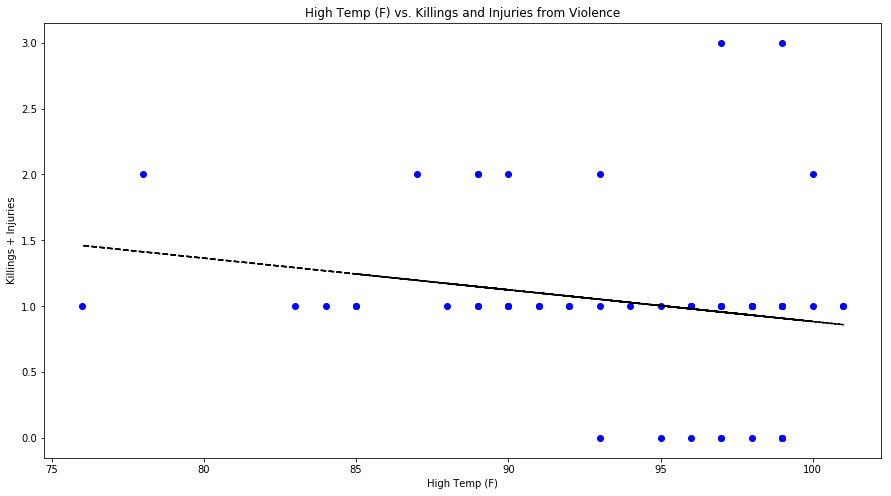

In [23]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

figure(figsize=(15,8))

fit = np.polyfit(df_joined['High_temp'].str.strip(u'\N{DEGREE SIGN}').astype(int), df_joined['num_Killed'] + df_joined['num_Injured'],1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(df_joined['High_temp'].str.strip(u'\N{DEGREE SIGN}').astype(int), df_joined['num_Killed'] + df_joined['num_Injured'], 'bo', df_joined['High_temp'].str.strip(u'\N{DEGREE SIGN}').astype(int), fit_fn(df_joined['High_temp'].str.strip(u'\N{DEGREE SIGN}').astype(int)), '--k')

plt.title('High Temp (F) vs. Killings and Injuries from Violence')
plt.xlabel('High Temp (F)')
plt.ylabel('Killings + Injuries')

plt.savefig('img/temp_vs_violence.png')

plt.show()